# Global Temperature Change Analysis
We analize the annual global mean temperature anomalies provided by the [Goddard Institute for Space Studies (GISS)](https://data.giss.nasa.gov/gistemp/). The [dataset](https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv) is available for download as CSV file from the GISS website.

In [215]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates
from osgeo import gdal, osr, ogr
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
from platform import python_version
print("Python version: %s"%python_version())
print("NumPy version: %s"%np.__version__)
print("Pandas version: %s"%pd.__version__)
print('GDAL version: %s'%gdal.__version__)
print("GeoPandas version: %s"%gpd.__version__)

Python version: 3.11.5
NumPy version: 1.25.2
Pandas version: 2.1.1
GDAL version: 3.7.2
GeoPandas version: 0.14.0


In [210]:
url = 'https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv'
ds_path = 'data/GISTemp.csv'
giss_temp = pd.read_csv(ds_path)

In [211]:
year_index = pd.date_range('1880', '2023', freq='Y')
giss_temp.drop(giss_temp.tail(1).index,inplace=True)
giss_temp['Dec'] = pd.to_numeric(giss_temp['Dec'])
giss_temp.set_index(year_index, inplace=True)
giss_temp.drop('Year', axis=1, inplace=True)
giss_temp.head(2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
1880-12-31,-0.19,-0.24,-0.09,-0.16,-0.10,-0.21,-0.17,-0.10,-0.14,-0.23,-0.21,-0.18,-0.17,***,***,-0.12,-0.16,-0.19
1881-12-31,-0.19,-0.14,0.03,0.05,0.07,-0.19,0.00,-0.04,-0.15,-0.22,-0.19,-0.07,-0.09,-0.09,-0.17,0.05,-0.07,-0.19


In [212]:
annual_mean = []
for index, row in giss_temp.iterrows():
    sum = 0
    months = 0
    for col in giss_temp.columns[0:12]:
        sum += row[col]  
    annual_mean.append(round(sum / 12, 2))

In [220]:
giss_temp['Annual Mean'] = annual_mean
giss_temp.head(2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Annual Mean
1880-12-31,-0.19,-0.24,-0.09,-0.16,-0.10,-0.21,-0.17,-0.10,-0.14,-0.23,-0.21,-0.18,-0.17,***,***,-0.12,-0.16,-0.19,-0.17
1881-12-31,-0.19,-0.14,0.03,0.05,0.07,-0.19,0.00,-0.04,-0.15,-0.22,-0.19,-0.07,-0.09,-0.09,-0.17,0.05,-0.07,-0.19,-0.09


## Uncertainty
The uncertainty is provided in an additional [file](https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/totalCI_ERA.csv) available from the [GISS](https://data.giss.nasa.gov/gistemp/graphs_v4/) website

In [225]:
url_error_data = 'https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/totalCI_ERA.csv'
error_data = pd.read_csv(url_error_data)
error_data['ci95'].astype(float)
error_data.tail(2)

,year,ci95
141,2021,0.053858
142,2022,0.053858


In [233]:
giss_temp['Uncertainty'] = error_data['ci95'].tolist()
giss_temp.head(2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Annual Mean,Uncertainty
1880-12-31,-0.19,-0.24,-0.09,-0.16,-0.10,-0.21,-0.17,-0.10,-0.14,-0.23,-0.21,-0.18,-0.17,***,***,-0.12,-0.16,-0.19,-0.17,0.138795
1881-12-31,-0.19,-0.14,0.03,0.05,0.07,-0.19,0.00,-0.04,-0.15,-0.22,-0.19,-0.07,-0.09,-0.09,-0.17,0.05,-0.07,-0.19,-0.09,0.134320


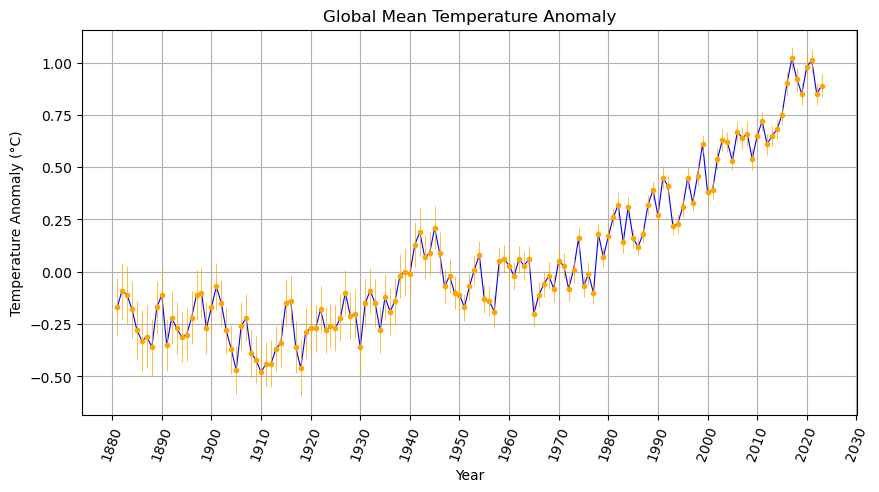

In [240]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(True)
ax.set_title('Global Mean Temperature Anomaly')
ax.set_ylabel('Temperature Anomaly (°C)')
ax.set_xlabel('Year')
ax.set_xticks(giss_temp.index)
ax.set_xticklabels(giss_temp.index, rotation=70)
ax.xaxis.set_major_locator(dates.YearLocator(10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt_giss_temp = ax.plot(giss_temp['Annual Mean'], linewidth=0.8, label='temp.anom', color='blue')
plt_giss_error= ax.errorbar(giss_temp.index, giss_temp['Annual Mean'], yerr=giss_temp['Uncertainty'], linewidth=0.5, color='orange', fmt='.k');
#plt.legend(loc='upper left')
plt.savefig('giss_anomaly.png', dpi=300)